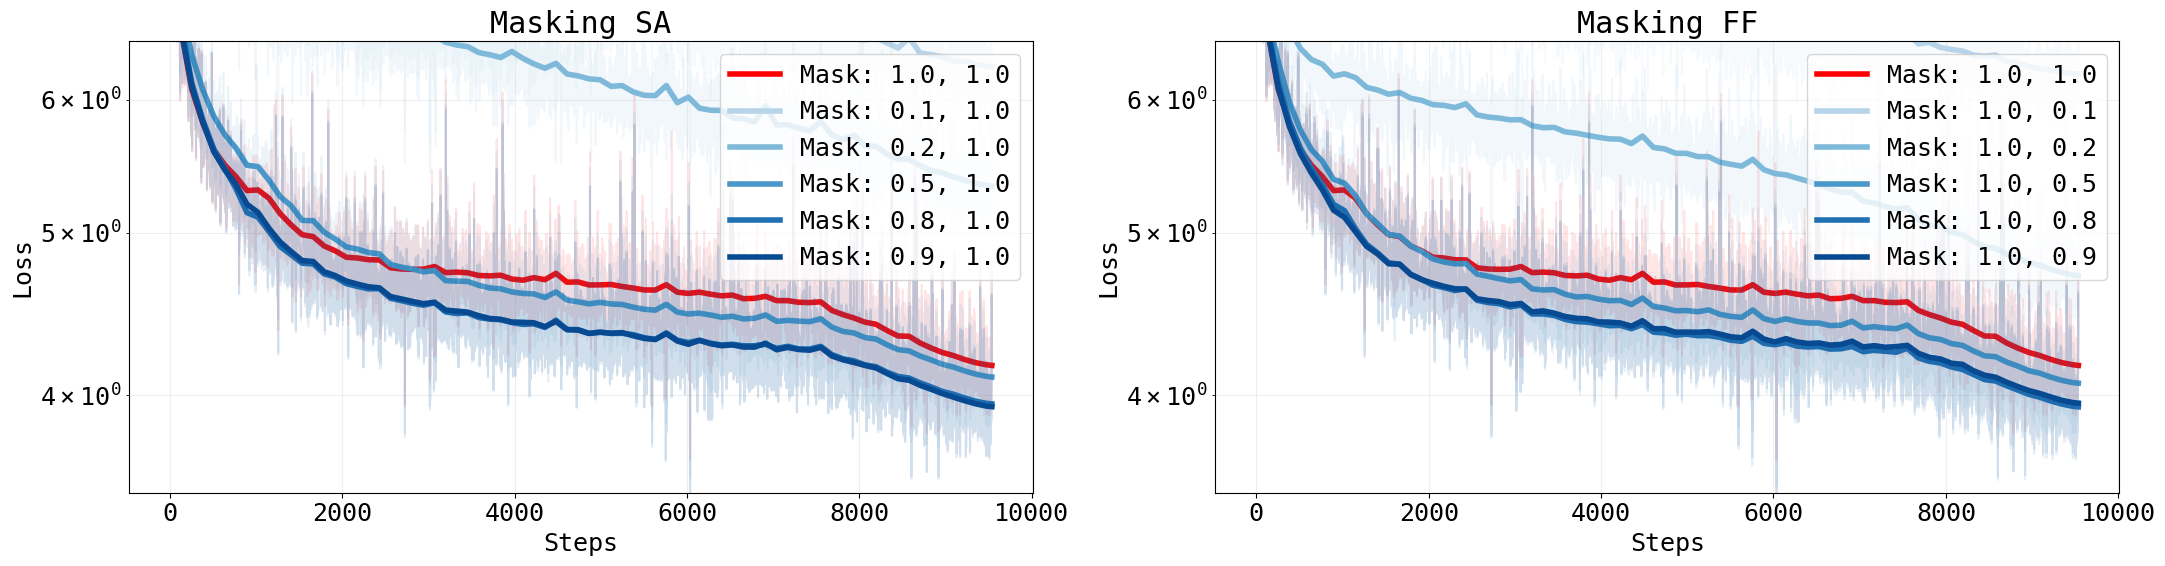

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
import os

def parse_log_file(file_path):
    steps, train_loss, val_steps, val_loss = [], [], [], []
    with open(file_path, 'r') as f:
        for line in f:
            match = re.match(r's:(\d+) (trl|tel):(\d+\.\d+)', line.strip())
            if match:
                step, loss_type, loss = int(match.group(1)), match.group(2), float(match.group(3))
                if loss_type == 'trl':
                    steps.append(step)
                    train_loss.append(loss)
                else:
                    val_steps.append(step)
                    val_loss.append(loss)
    return np.array(steps), np.array(train_loss), np.array(val_steps), np.array(val_loss)

def smooth_moving_average(signal, window_size):
    if signal.ndim != 1:
        raise ValueError("smooth_moving_average only accepts 1D arrays.")
    if signal.size < window_size:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_size < 3:
        return signal

    s = np.pad(signal, (window_size//2, window_size-1-window_size//2), mode='edge')
    w = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(s, w, mode='valid')
    return smoothed_signal

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 18

def plot_subplot(ax, folders, title):
    baseline_color = 'red'
    blue_shades = plt.cm.Blues(np.linspace(0.3, 0.9, 5))  # 5 shades of blue

    for folder, color in zip(folders, ['red'] + list(blue_shades)):
        log_file = glob.glob(f"{folder}/*.log")[0]
        steps, train_loss, val_steps, val_loss = parse_log_file(log_file)
        
        mask_values = re.search(r'pylog124M_(\d+\.\d+)_(\d+\.\d+)_300M', folder)
        if mask_values:
            label = f'Mask: {mask_values.group(1)}, {mask_values.group(2)}'
        else:
            label = folder
        
        ax.plot(steps, train_loss, color=color, alpha=0.1)
        
        if len(val_loss) > 0:
            ax.plot(val_steps, val_loss, color=color, alpha=1.0, linewidth=4, label=label)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Loss')
    ax.set_yscale('log')
    ax.set_ylim(3.5, 6.5)
    ax.set_title(title)
    ax.legend()
    ax.grid(True, which="both", ls="-", alpha=0.2)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

# Subplot 1
folders1 = [
    "pylog124M_1.0_1.0_300M",  # Baseline
    "pylog124M_0.1_1.0_300M",
    "pylog124M_0.2_1.0_300M",
    "pylog124M_0.5_1.0_300M",
    "pylog124M_0.8_1.0_300M",
    "pylog124M_0.9_1.0_300M"
]
plot_subplot(ax1, folders1, 'Masking SA')

# Subplot 2
folders2 = [
    "pylog124M_1.0_1.0_300M",  # Baseline
    "pylog124M_1.0_0.1_300M",
    "pylog124M_1.0_0.2_300M",
    "pylog124M_1.0_0.5_300M",
    "pylog124M_1.0_0.8_300M",
    "pylog124M_1.0_0.9_300M"
]
plot_subplot(ax2, folders2, 'Masking FF')

plt.tight_layout()
plt.show()

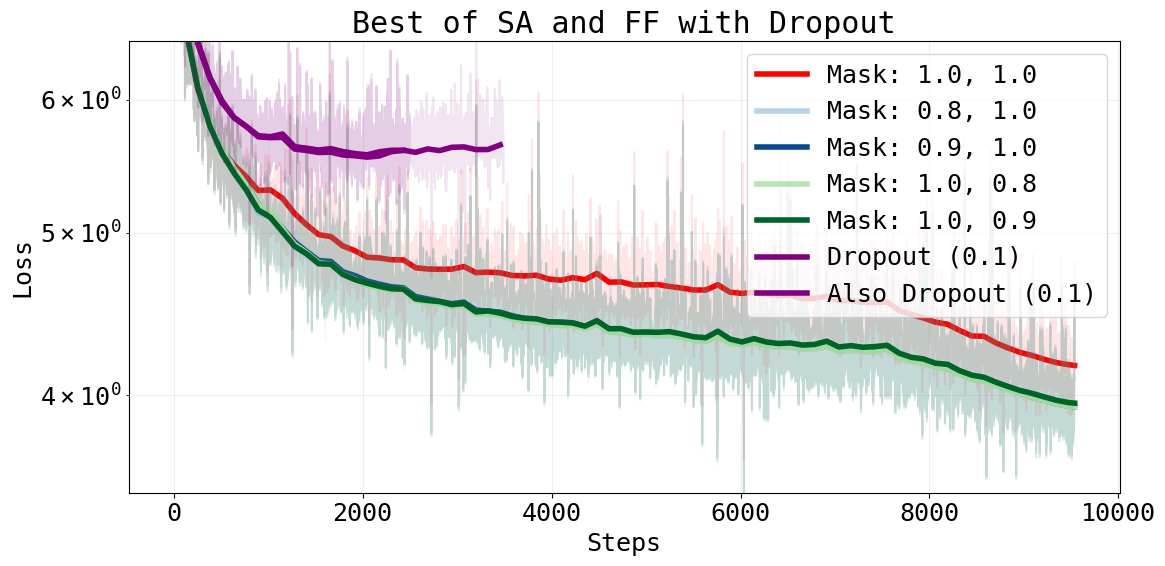

In [20]:
# Create a single plot
fig, ax = plt.subplots(figsize=(12, 6))

folders = [
    "pylog124M_1.0_1.0_300M",  # Baseline
    "pylog124M_0.8_1.0_300M",
    "pylog124M_0.9_1.0_300M",
    "pylog124M_1.0_0.8_300M",
    "pylog124M_1.0_0.9_300M",
    "pylog124M_dropout",
    "pylog124M_dropout2"  # Added dropout folder
]

blue_shades = plt.cm.Blues(np.linspace(0.3, 0.9, 2))
green_shades = plt.cm.Greens(np.linspace(0.3, 0.9, 2))
colors = ['red'] + list(blue_shades) + list(green_shades) + ['purple'] + ['purple'] # Added color for dropout

for folder, color in zip(folders, colors):
    log_file = glob.glob(f"{folder}/*.log")[0]
    steps, train_loss, val_steps, val_loss = parse_log_file(log_file)
    
    if folder == "pylog124M_dropout":
        label = "Dropout (0.1)"
    elif folder == "pylog124M_dropout2":
        label = "Also Dropout (0.1)"
    else:
        mask_values = re.search(r'pylog124M_(\d+\.\d+)_(\d+\.\d+)_300M', folder)
        if mask_values:
            label = f'Mask: {mask_values.group(1)}, {mask_values.group(2)}'
        else:
            label = 'Baseline'
    
    ax.plot(steps, train_loss, color=color, alpha=0.1)
    
    if len(val_loss) > 0:
        ax.plot(val_steps, val_loss, color=color, alpha=1.0, linewidth=4, label=label)

ax.set_xlabel('Steps')
ax.set_ylabel('Loss')
ax.set_yscale('log')
ax.set_ylim(3.5, 6.5)
ax.set_title('Best of SA and FF with Dropout')
ax.legend()
ax.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()